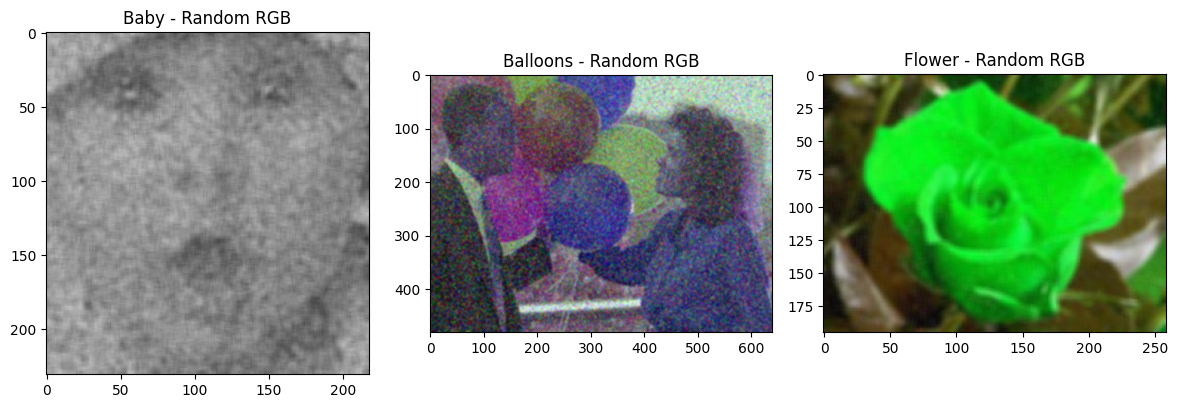

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from scipy.ndimage import gaussian_filter
import matplotlib.pylab as plt
import random

# opening the image and converting it to grayscale
a1 = iio.imread('exercise/baby.jpeg')
a2 = iio.imread('exercise/balloons_noisy.png')
a3 = iio.imread('exercise/flower.jpeg')

# initializing the filter of size 5 by 5
# the filter is divided by 25 for normalization
k = np.ones((5, 5)) / 25

# performing convolution
if a1.ndim ==3:
    b1 = np.zeros_like(a1)
    for c in range(3):
        b1[:,:,c] = sn.convolve(a1[:,:,c], k).astype(np.uint8)
else:
    b1 = sn.convolve(a1, k).astype(np.uint8)

if a2.ndim ==3:
    b2 = np.zeros_like(a2)
    for c in range(3):
        b2[:,:,c] = sn.convolve(a2[:,:,c], k).astype(np.uint8)
else:
    b2 = sn.convolve(a2, k).astype(np.uint8)

if a3.ndim ==3:
    b3 = np.zeros_like(a3)
    for c in range(3):
        b3[:,:,c] = sn.convolve(a3[:,:,c], k).astype(np.uint8)
else:
    b3 = sn.convolve(a3, k).astype(np.uint8)

# Hàm đổi thứ tự RGB ngẫu nhiên
def shuffle_rgb(image):
    channls = [0, 1, 2]
    random.shuffle(channls)
    return image[:,:,channls]

rgb1 = shuffle_rgb(b1)
rgb2 = shuffle_rgb(b2)
rgb3 = shuffle_rgb(b3)

iio.imwrite('baby_rgb_random.png', rgb1)
iio.imwrite('balloons_rgb_random.png', rgb2)
iio.imwrite('flower_rgb_random.png', rgb3)  

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(rgb1)
plt.title("Baby - Random RGB")

plt.subplot(1, 3, 2)
plt.imshow(rgb2)
plt.title("Balloons - Random RGB")

plt.subplot(1, 3, 3)
plt.imshow(rgb3)
plt.title("Flower - Random RGB")

plt.tight_layout()
plt.show()



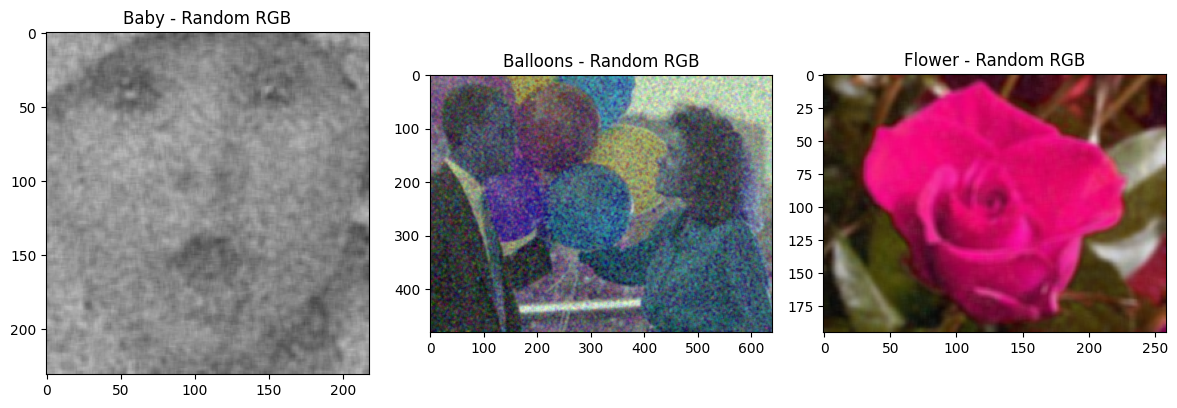

In [10]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from scipy.ndimage import gaussian_filter
import matplotlib.pylab as plt
import random
import colorsys

# opening the image and converting it to grayscale
a1 = iio.imread('exercise/baby.jpeg')
a2 = iio.imread('exercise/balloons_noisy.png')
a3 = iio.imread('exercise/flower.jpeg')

# initializing the filter of size 5 by 5
# the filter is divided by 25 for normalization
k = np.ones((5, 5)) / 25

# performing convolution
if a1.ndim ==3:
    b1 = np.zeros_like(a1)
    for c in range(3):
        b1[:,:,c] = sn.convolve(a1[:,:,c], k).astype(np.uint8)
else:
    b1 = sn.convolve(a1, k).astype(np.uint8)

if a2.ndim ==3:
    b2 = np.zeros_like(a2)
    for c in range(3):
        b2[:,:,c] = sn.convolve(a2[:,:,c], k).astype(np.uint8)
else:
    b2 = sn.convolve(a2, k).astype(np.uint8)

if a3.ndim ==3:
    b3 = np.zeros_like(a3)
    for c in range(3):
        b3[:,:,c] = sn.convolve(a3[:,:,c], k).astype(np.uint8)
else:
    b3 = sn.convolve(a3, k).astype(np.uint8)



def random_hue_shift(img):
    # Chuẩn hóa ảnh về [0, 1]
    img = img / 255.0
    # Chuyển RGB -> HSV

    rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
    h, s, v = rgb2hsv(img[:, :, 0], img[:, :, 1], img[:, :, 2])
    
    # Tạo độ lệch hue ngẫu nhiên (không trùng nhau)
    shift = random.uniform(0.05,0.95)
    h_new = (h + shift) % 1.0


    # Chuyển HSV -> RGB
    hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
    r, g, b = hsv2rgb(h_new, s, v)

    # Ghép lại và chuyển về uint8
    result = np.stack((r, g, b), axis=-1)
    return (result * 255).astype(np.uint8)

img1 = random_hue_shift(b1)
img2 = random_hue_shift(b2)
img3 = random_hue_shift(b3)


iio.imwrite('baby_hsv_random.png', img1)
iio.imwrite('balloons_hsv_random.png', img2)
iio.imwrite('flower_hsv_random.png', img3)  

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.title("Baby - Random RGB")

plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.title("Balloons - Random RGB")

plt.subplot(1, 3, 3)
plt.imshow(img3)
plt.title("Flower - Random RGB")

plt.tight_layout()
plt.show()
